In [30]:
from sympy import symbols, Eq, solve
import numpy as np
import matplotlib.pyplot as plt

In [31]:
v1 = 1 # m/s
nu1 = 10e-7 # m^2/s
rho1 = 1000 # kg/m^3
h1 = 0.25 # m
L1 = 0.5 # m
l1 = 1.75 # m
L_t1 = 0.1 # m

In [32]:
def powerr(c_pp, c_dd):
    
    f_form = (1/2)*(c_pp)*(rho1)*(v1**2)*(h1*L1)
    
    f_viscL = 2*(rho1)*(nu1**(1/2))*(v1**(3/2))*h1*np.sqrt(L_t1)
    
    f_dragL = 2*(1/2)*(c_dd)*(rho1)*(v1**2)*h1*(l1 - L_t1)
    
    f_viscFB = 2*(rho1)*(nu1**(1/2))*(v1**(3/2))*L1*np.sqrt(L_t1)
    
    f_dragFB = 2*(1/2)*(c_dd)*(rho1)*(v1**2)*L1*(l1 - L_t1)
    
    tot_force = f_form + f_viscL + f_dragL + f_viscFB + f_dragFB
    
    return v1*tot_force

In [33]:
print('Total power required to maintain 1m/s speed is', powerr(1, 1), 'W')

Total power required to maintain 1m/s speed is 1300.4743416490253 W


In [34]:
power = 1300

v = 1 # m/s
nu = 10e-7 # m^2/s (0.0000001 = (1*10)^-6 = 10e-7)
rho = 1000 # kg/m^3
h1 = 0.25 # m
L1 = 0.5 # m
l1 = 1.75 # m
L_t1 = 0.1 # m

c_p = 1
c_d = 1

In [35]:
def speed(nu):
    
    v = symbols("v")
    
    f_form = (1/2)*(c_p)*(rho)*(v**2)*(h*L)
    
    f_viscL = 2*(rho)*(nu**(1/2))*(v**(3/2))*h*np.sqrt(L_t)
    
    f_dragL = 2*(1/2)*(c_d)*(rho)*(v**2)*h*(l - L_t)
    
    f_viscFB = 2*(rho)*(nu**(1/2))*(v**(3/2))*L*np.sqrt(L_t)
    
    f_dragFB = 2*(1/2)*(c_d)*(rho)*(v**2)*L*(l - L_t)
    
    tot_force = f_form + f_viscL + f_dragL + f_viscFB + f_dragFB

    
    eqn = power - tot_force*v
    
    sped = solve(eqn, v)[0]
    
        
    return sped

In [36]:
# check that speed(10e-7) gives 1
speed(10e-7)

0.999878396121374

In [37]:
new_nus = [nu*i for i in [1, 10, 100, 250, 500, 1000, 2500, 5000, 10000]]

In [39]:
speedz = [0 for i in range(len(new_nus))]
for i in range(len(new_nus)):
    speedz[i] = speed(new_nus[i])

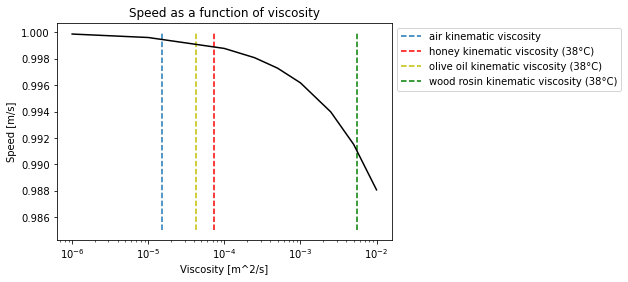

In [43]:
# viscosity references: https://www.engineersedge.com/fluid_flow/kinematic-viscosity-table.htm

plt.plot(new_nus, speedz, 'k')

plt.vlines(x = (1.5)*10e-6, ymin = 0.985, ymax = 1, label = 'air kinematic viscosity', linestyle = '--')
plt.vlines(x = (7.3)*10e-6, ymin = 0.985, ymax = 1, label = 'honey kinematic viscosity (38°C)', linestyle = '--', color = 'r')
plt.vlines(x = (4.3)*10e-6, ymin = 0.985, ymax = 1, label = 'olive oil kinematic viscosity (38°C)', linestyle = '--', color = 'y')
plt.vlines(x = (5.6)*10e-4, ymin = 0.985, ymax = 1, label = 'wood rosin kinematic viscosity (38°C)', linestyle = '--', color = 'g')

plt.title('Speed as a function of viscosity')
plt.xlabel('Viscosity [m^2/s]')
plt.ylabel('Speed [m/s]')
plt.xscale('log')

plt.legend(bbox_to_anchor=(1.7, 1))

In [44]:
def perc(spedz):
    
    p = [0 for i in range(len(spedz))]
    for i in range(len(spedz)):
        p[i] = (1 - spedz[i])*100
        
    return p

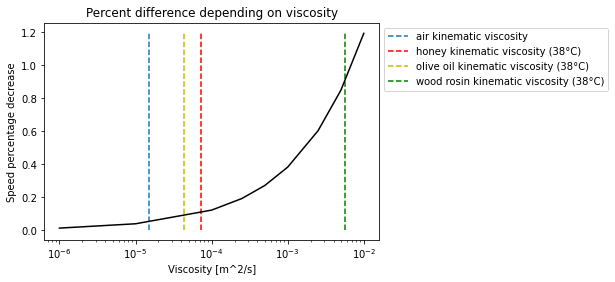

In [58]:
percentages = perc(speedz)

plt.plot(new_nus, percentages, 'k')
plt.vlines(x = (1.5)*10e-6, ymin = 0, ymax = 1.2, label = 'air kinematic viscosity', linestyle='--')
plt.vlines(x = (7.3)*10e-6, ymin = 0, ymax = 1.2, label = 'honey kinematic viscosity (38°C)', linestyle='--', color='r')
plt.vlines(x = (4.3)*10e-6, ymin = 0, ymax = 1.2, label = 'olive oil kinematic viscosity (38°C)', linestyle='--', color='y')
plt.vlines(x = (5.6)*10e-4, ymin = 0, ymax = 1.2, label = 'wood rosin kinematic viscosity (38°C)', linestyle='--', color='g')



plt.xscale('log')
plt.title('Percent difference depending on viscosity')
plt.ylabel('Speed percentage decrease')
plt.xlabel('Viscosity [m^2/s]')
plt.legend(bbox_to_anchor=(1.7, 1))

It seems like the order of magnitude of my speed decrease is erroneous. My results show that swimming in honey only decreases the swimming speed by less than 0.2% compared to water with the same power, which seems unreasonable given my own experience of how viscous honey is. It's most likely that either 1) the equations for my total power is erroneous or 2) the parameters I've chosen for my computations are wrong. This will be looked into later

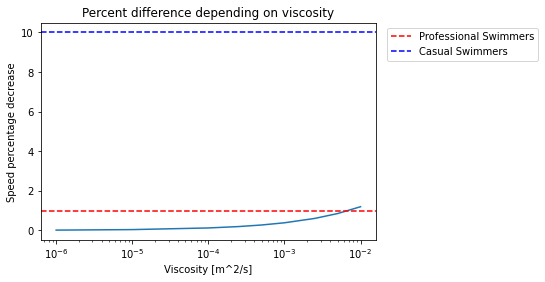

In [59]:
# professional swimmer margin of error = 0.01m/s 
# reference https://www.fina.org/competitions/5/olympic-games-tokyo-2020/results?disciplines=&event=cc344f88-0bc1-4dc8-be43-68344ee9c665
# look at 100m men freestyle => 1st, 2nd, 3rd place avg speed = 2.127m/s, 2.124m/s & 2.108m/s
# casual swimmer margin of error = expect time difference of the order of the second for 100m => about 0.1m/s avg speed difference

pro_perc = 0.01*100
casu_perc = 0.1*100

plt.plot(new_nus, np.array(percentages))
plt.xscale('log')
plt.title('Percent difference depending on viscosity')
plt.ylabel('Speed percentage decrease')
plt.xlabel('Viscosity [m^2/s]')

plt.axhline(pro_perc, color = 'r', linestyle = '--', label = "Professional Swimmers")
plt.axhline(casu_perc, color = 'b', linestyle = '--', label = "Casual Swimmers")

plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

From this plot it seems like the viscosity of the fluid needs to be increased to order 0.01 before reaching the margin of error of professional swimmers (so like wood rosin). Again, this seems rather unreasonable, as this plot says that a pool's water needs to be turned into wood rosin in order to reach a speed decrease whose order of magnitude is the same as the margin of error of professional swimmers' speed.

If I try to play with the parameters I am most uncertain of (c_p and c_d): from reference (https://www.semanticscholar.org/paper/Hydrodynamic-drag-during-gliding-in-swimming.-Marinho-Reis/a70e080f6cbe37b37a57cf48518cc9e48ac63b0e), maybe the order of magnitude of c_p and c_d should be around 0.5 (but certainly not past 1)

This gives

In [67]:
v1 = 1 # m/s
nu1 = 10e-7 # m^2/s
rho1 = 1000 # kg/m^3
h1 = 0.25 # m
L1 = 0.5 # m
l1 = 1.75 # m
L_t1 = 0.1 # m

In [70]:
print('Total power required to maintain 1m/s speed is', powerr(0.5, 0.5), 'W')

Total power required to maintain 1m/s speed is 650.4743416490253 W


In [73]:
power = 650

v = 1 # m/s
nu = 10e-7 # m^2/s (0.0000001 = (1*10)^-6 = 10e-7)
rho = 1000 # kg/m^3
h1 = 0.25 # m
L1 = 0.5 # m
l1 = 1.75 # m
L_t1 = 0.1 # m

c_p = 0.5
c_d = 0.5

In [74]:
speedz2 = [0 for i in range(len(new_nus))]
for i in range(len(new_nus)):
    speedz2[i] = speed(new_nus[i])

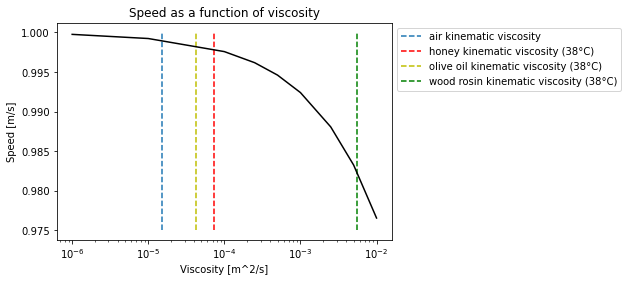

In [76]:
plt.plot(new_nus, speedz2, 'k')

plt.vlines(x = (1.5)*10e-6, ymin = 0.975, ymax = 1, label = 'air kinematic viscosity', linestyle = '--')
plt.vlines(x = (7.3)*10e-6, ymin = 0.975, ymax = 1, label = 'honey kinematic viscosity (38°C)', linestyle = '--', color = 'r')
plt.vlines(x = (4.3)*10e-6, ymin = 0.975, ymax = 1, label = 'olive oil kinematic viscosity (38°C)', linestyle = '--', color = 'y')
plt.vlines(x = (5.6)*10e-4, ymin = 0.975, ymax = 1, label = 'wood rosin kinematic viscosity (38°C)', linestyle = '--', color = 'g')

plt.title('Speed as a function of viscosity')
plt.xlabel('Viscosity [m^2/s]')
plt.ylabel('Speed [m/s]')
plt.xscale('log')

plt.legend(bbox_to_anchor=(1.7, 1))

Given the order of decrease of speed, which is still of the same magnitude as before, it seems like changing c_p or c_d doesn't do much. I think the problems is in my equations and they way I have chosen them, however I don't know what went wrong.